<a href="https://colab.research.google.com/github/tasdid25/Machine-learning/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('shop data.csv')

In [ ]:
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [ ]:
x = df.drop('buys', axis=1)

In [ ]:
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [ ]:
#y = df.iloc[:,4]
y = df.buys

In [ ]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
15    yes
16    yes
17    yes
18    yes
19    yes
20     no
21    yes
Name: buys, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_x = LabelEncoder()
x = x.apply(le_x.fit_transform)

In [ ]:
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30, random_state=2)

In [ ]:
xtrain

,age,income,gender,m_status
10,1,2,0,1
9,2,2,0,0
4,2,1,0,1
5,2,1,0,1
16,2,2,1,0
1,1,0,1,0
2,0,0,1,1
7,1,2,1,0
18,0,2,0,0
17,1,0,0,1


In [ ]:
xtest

,age,income,gender,m_status
12,0,0,0,1
0,1,0,1,1
14,1,0,1,1
6,0,1,0,0
19,0,0,1,1
20,2,2,0,0
3,2,2,1,1


In [ ]:
ytest

12    yes
0      no
14     no
6     yes
19    yes
20     no
3     yes
Name: buys, dtype: object

In [ ]:
ytrain

10    yes
9     yes
4     yes
5      no
16    yes
1      no
2     yes
7      no
18    yes
17    yes
11    yes
21    yes
13     no
15    yes
8     yes
Name: buys, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dect = DecisionTreeClassifier()
dect.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
dect.predict(xtest)

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
ytest

In [ ]:
dect.score(xtest, ytest)

0.5714285714285714

**Performance using cross_val_score**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
result = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
result

array([0.6 , 0.6 , 0.75, 0.25, 0.5 ])

In [ ]:
result.mean()

0.54

In [ ]:
from sklearn.linear_model import LogisticRegression
result = cross_val_score(LogisticRegression(), x, y, cv=5)
result

array([0.4 , 0.6 , 0.75, 0.5 , 0.75])

In [ ]:
result.mean()

0.6

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()

x_scaled = MMS.fit_transform(x)
x_scaled

array([[0.5, 0. , 1. , 1. ],
       [0.5, 0. , 1. , 0. ],
       [0. , 0. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 0.5, 0. , 1. ],
       [1. , 0.5, 0. , 1. ],
       [0. , 0.5, 0. , 0. ],
       [0.5, 1. , 1. , 0. ],
       [0.5, 0.5, 0. , 1. ],
       [1. , 1. , 0. , 0. ],
       [0.5, 1. , 0. , 1. ],
       [0. , 1. , 1. , 0. ],
       [0. , 0. , 0. , 1. ],
       [1. , 1. , 1. , 0. ],
       [0.5, 0. , 1. , 1. ],
       [0.5, 0. , 0. , 0. ],
       [1. , 1. , 1. , 0. ],
       [0.5, 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 1. ],
       [1. , 1. , 0. , 0. ],
       [0.5, 0.5, 1. , 1. ]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
result = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_scaled, y, cv=5)
result

array([0.8 , 0.4 , 0.75, 0.5 , 0.25])

In [ ]:
result.mean()

0.54

In [ ]:
y_predict = dect.predict(xtest)
y_predict

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
ytest

12    yes
0      no
14     no
6     yes
19    yes
20     no
3     yes
Name: buys, dtype: object

In [ ]:
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(ytest,y_predict)
cm

array([[0, 3],
       [0, 4]], dtype=int64)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display

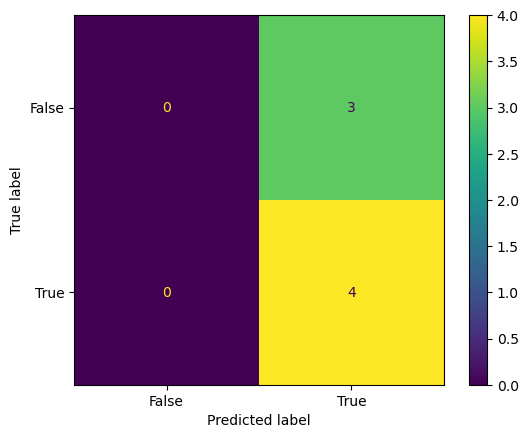

In [ ]:
cm_display.plot()

In [ ]:
metrics.accuracy_score(ytest,y_predict)

0.5714285714285714

In [ ]:
metrics.precision_score(ytest,y_predict, average=None)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.57142857])

In [ ]:
metrics.recall_score(ytest,y_predict, average=None)

array([0., 1.])

In [ ]:
metrics.f1_score(ytest,y_predict, average=None)

array([0.        , 0.72727273])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00         3
         yes       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#xinput = np.array([1,0,0,1])
xinput = np.array([1,0,1,1])

In [ ]:
y_predict = dect.predict([xinput])

In [ ]:
y_predict

In [ ]:
x.columns.tolist()

[Text(0.4444444444444444, 0.9, 'gender <= 0.5\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.2222222222222222, 0.7, 'age <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3333333333333333, 0.5, 'income <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.7, 'age <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.5, 'm_status <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.6666666666666666, 0.3, 'age <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text

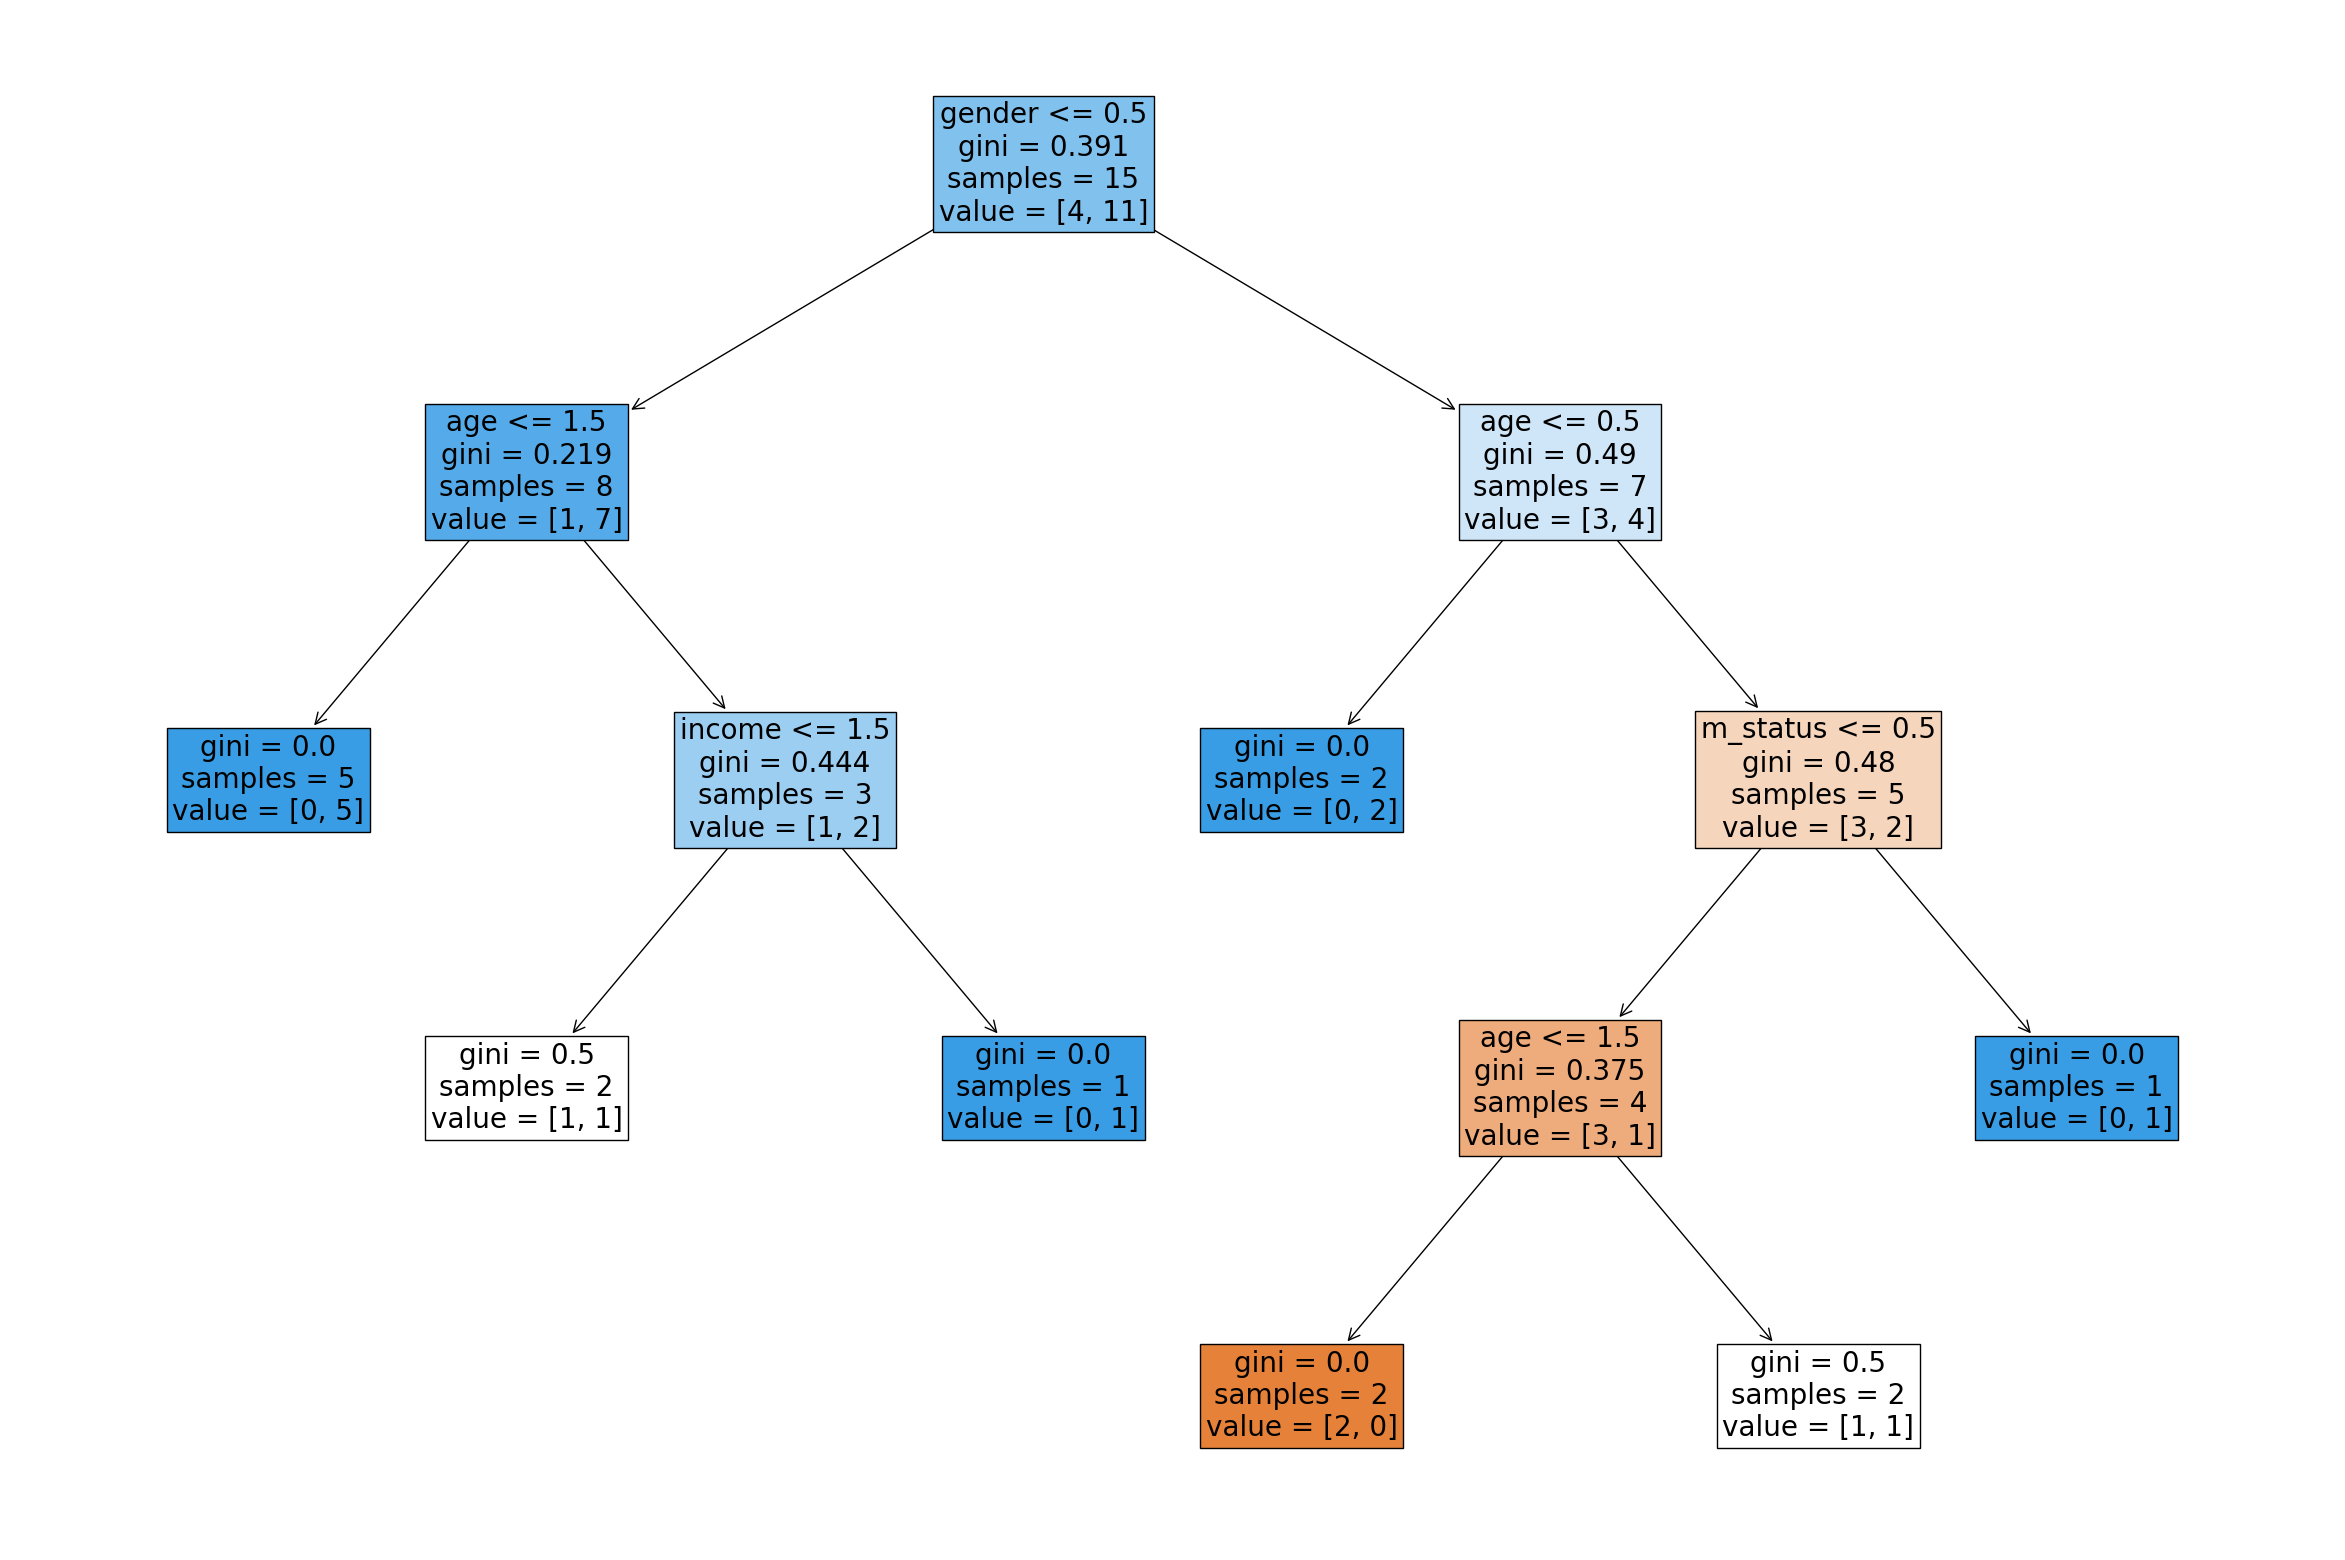

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(30,20))
tree.plot_tree(dect, feature_names=x.columns.tolist(), filled=True, fontsize=20)

### Tree Explanation

<img src="tree.jpg" />